# Exercise 6.10 - Find an Initial String Displacement to Induce a Certain Wavelength Vibration on a String

## Problem Statement

Devise an initial string displacement that gives rise to a vibration in which the only frequency present is the one corresponding to the Fourier component with a wavelength of $2L/3$, where $L$ is the length of the string.

## Wave Mechanics

A couple of useful formulae:

$$\lambda = \frac{2L}{m} \hspace{5 cm} m \in \{1, 2, 3 ...\}$$

$$c = \lambda f$$

$$c = \sqrt{\frac{T}{\mu}}$$

$$\mu = \frac{\partial M(x)}{\partial x}$$

$$\frac{\partial^2 f}{\partial t^2} - c^2 \frac{\partial^2 f}{\partial x^2} = 0$$

## Numerical Derivatives

$$\frac{\partial^2}{\partial x^2} (f(x, t)) \approx \frac{f(x + h, t) - 2 f(x, t) + f(x - h, t)}{2 h^2}$$

Using this in the wave equation to manipulate for usage of a wave propogating on a string, this simplifies to

$$\frac{y_j^{n-1} - 2y_j^n + y_j^{n + 1}}{2 \tau^2} = c^2 \frac{y_{j - 1}^n - 2y_j^n + y_{j + 1}^n}{2 h^2}$$

where $n$ denotes the time index, and $j$ the spacial index. So, using this to find the next time step values, we reduce to

$$y_j^{n + 1} = \frac{c^2 \tau^2}{h^2} (y_{j - 1}^n - 2y_j^n + y_{j + 1}^n) - y_j^{n - 1} + 2y_j^n$$

To get the proportion of $\tau^2 / h^2$ to a value which does not cause the numerical solution to diverge, I let this fraction equal 1. For guaranteed convergence, $c = 0.5$ will be used. The Giordano text shows that this proportion can be equal to 1, but should also be acceptable for any value less than 1. The Giordano text demonstrates that this constant is called the Courant number.

## Problem Solution Process

To solve this wave problem, I'll need to make use of a clarification which the question asks. Since it is asking for a Fourier component whose wavelength, $\lambda$, to be equal to $2L/3$, we can transform the problem into finding a specific frequency associated with that wavelength.

$$f = \frac{c}{\lambda} = \frac{3}{2L} \, \text{Hz}$$

To decrease the frequency of the wave, I will have to make L large. But for convenience, I will choose L an integer such that the frequency is $1/2$. So,

$$L = 3 \, \text{m}$$

which cleanly produces

$$f = \frac{1}{2} \, \text{Hz}$$

or

$$\omega = \pi \, \text{rad / s}$$

In [1]:
# Wave on a string - single frequency of pi radians
%matplotlib
import matplotlib.pyplot as plt
import numpy as np

class String:
    def __init__(self, L : float, x: np.array, yMinus : np.array, yInitial : np.array, dt : float, courantNumber : float):
        self.L = L
        self.x = x
        self.yMinus = yMinus
        self.y = yInitial
        self.BoundaryConditions()
        self.N = len(yInitial)
        self.dt = dt
        self.C = courantNumber
    
    def BoundaryConditions(self):
        self.y[0], self.y[-1] = 0.0, 0.0
        return None
        
    def TimeEvolve(self):
        yCurrent = np.copy(self.y[1 : -1])
        jMinus = np.copy(self.y[0 : -2])
        jPlus = np.copy(self.y[2 :])
        # Update the y points for the next time step
        self.y[1 : -1] = self.C * (jMinus - 2 * yCurrent + jPlus) - self.yMinus + 2 * yCurrent
        # And then, update yMinus to what used to be yCurrent
        self.yMinus = np.copy(yCurrent)
        return None
    
    def Animate(self, _tf):
        _t = 0.0
        # Iterate through the time components
        while _t <= _tf:
            # Iterate the differential equation over the string solving for the next y values
            self.TimeEvolve()
            
            plt.plot(self.x, self.y, 'r-')
            plt.ylim(-5, 5)
            plt.draw()
            plt.pause(0.0001)
            plt.clf()
            
            # Increment the time by dt
            _t += self.dt
        
        plt.close()
        return None

# Set the initial conditions as stated above
L = 3.0
N = 99
x = np.linspace(0.0, L, N)
# The wave begins out with a sine wave which oscillates with a period of 2 seconds and a frequency of 0.5 Hz
yMinus = np.sin(np.pi * x[1 : -1])
yInitial = np.sin(np.pi * x)
# Enforce the boundary condiitons
yInitial[0], yInitial[-1] = 0.0, 0.0
# Define the Courant number
C = 0.5

# Make the string and animate the solution to the differential wave equation
string = String(L, x, yMinus, yInitial, 1e-2, C)
string.Animate(_tf = 5.0)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Using matplotlib backend: <object object at 0x7fdea0786750>


: 

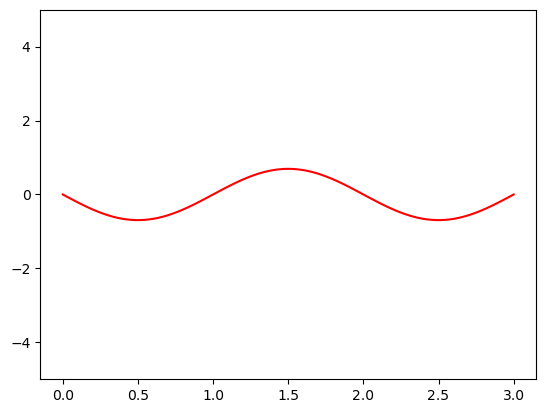

: 

In [3]:
%matplotlib inline
# Plot the initial conditions for the PDF format when downloaded
plt.plot(x, yInitial, 'r-')
plt.ylim(-5, 5)
plt.show()

## Fourier Series - What it Communicates

Making use of linear algebra techniques, we can show that any periodic function can be rewritten in terms of a sum of sine and cosine functions, whose amplitudes and frequencies can be found by integrating over all space the original function with sines and cosines. By doing so, a change of variable occurs where $f(x)$ is transformed to $f(k)$, which represents the same function in frequency space.

## Conclusion

Since we are trying to find a function which contains a single sinusoidal wave in its Fourier expansion, there must be a sine or cosine function with a leading coefficient of exactly 1. Hence, this function $f(x)$ is exactly that sine function with a wavenumber $k$ such that

$$f(x) = \sin( 2 \pi m x / 2 L ) \hspace{1 in} m \in N$$

which we defined above as

$$f(x) = \sin( \pi x )$$

since $L = 3$ and $m = 3$. So, this makes setting the initial conditions very easy, and shows that plucking the string from its center with an amplitude of 1 will satisfy the solution to this problem.